In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from nltk.corpus import stopwords
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
import pandas as pd
import re
import string
from textblob import TextBlob, Word, Blobber
import nltk
from nltk.corpus import stopwords
# print(stopwords.words('english'))
import plotly.express as px
from nltk.stem import WordNetLemmatizer 
from tensorflow.keras.preprocessing.text import one_hot
nltk.download('stopwords')
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold, RandomizedSearchCV, LeavePOut, StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NLP/NLP project/train.csv')

In [ ]:
len(df)

20800

In [ ]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
df = df.dropna()

In [ ]:
from tqdm.notebook import tqdm, trange
from nltk.stem import PorterStemmer
!pip install autocorrect
from autocorrect import Speller
from autocorrect import Speller

spell = Speller(lang='en')

porter = PorterStemmer()
from nltk.tokenize import sent_tokenize, word_tokenize
def lower_text(text):
    return str(text).lower()

def stemSentence(sentence):
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

def remove_stopwords(text):
    stoplist = stopwords.words('english')
    sps = stoplist
    return " ".join([word for word in str(text).split() if word not in sps])

def autospell(text):
    return " ".join([spell(word) for word in text.split()])

corpus=[]
def get_corpus(sentence):
    cps = []
    token_words=word_tokenize(sentence)
    for word in token_words:
        corpus.append(word)
    return sentence


def return_corpus(all_sentences):
    corpus=[]
    for sentence in all_sentences:
        cps = []
        token_words=word_tokenize(sentence)
        for word in token_words:
            corpus.append(word)
    return set(corpus)
    

     |████████████████████████████████| 622 kB 4.3 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.0-py3-none-any.whl size=622249 sha256=178eebb85de87931889f3d4b9afe05b9a796acfb7edf97dc6db9789e1bbb921a
  Stored in directory: /root/.cache/pip/wheels/fa/ce/aa/bc894efbe0541ce91dea21561d01d319783986d9787a8e9f58
Successfully built autocorrect


In [ ]:
df['text'] = df['text'].apply(remove_stopwords)
# df['title'] = df['title'].apply(remove_stopwords)

df['text'] = df['text'].apply(lemmatization)
# df['lemmatized_title'] = df['title'].apply(lemmatization)

df['text'] = df['text'].apply(lower_text)
# df['title'] = df['title'].apply(lower_text)
# df['author'] = df['author'].apply(lower_text)

In [ ]:
# dropping length 0, 1, 2 texts
ohr = []
for index in range(len(df)):
    # ohr.append(len(onehot_rep_test[index]))
    if len(df['text'][index])==0 or len(df['text'][index])==1 or len(df['text'][index])==2:
        ohr.append(index)
print(len(ohr), len(df))
df = df.drop(ohr)        
df = df.sample(frac=1).reset_index(drop=True)
print(len(df))

79 20800
20721


In [ ]:
df['text'] = df['text'].apply(get_corpus)
df['title'] = df['title'].apply(get_corpus)
df['author'] = df['author'].apply(get_corpus)


In [ ]:
corpus = set(corpus)

In [ ]:
df['text']

0        house dem aide: we didn’t even see comey’s let...
1        ever get feeling life circles roundabout rathe...
2        why truth might get you fired october 29, 2016...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman sentenced six years pri...
                               ...                        
18280    rapper t. i. unloaded black celebrities met do...
18281    when green bay packers lost washington redskin...
18282    the macy’s today grew union several great name...
18283    nato, russia to hold parallel exercises in bal...
18284    david swanson author, activist, journalist, ra...
Name: text, Length: 18211, dtype: object

In [ ]:
len(corpus)

198774

#EDA

In [ ]:
y_eda=df['label']
X_eda=df.drop('label',axis=1)


In [ ]:
len(df[df['label']==1]), len(df[df['label']==0])

(10334, 10387)

Text(0.5, 1.0, 'Bar Chart of label')

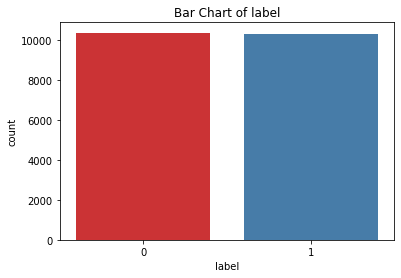

In [ ]:
import seaborn as sns
ax = sns.countplot(x = "label", data = df, palette = "Set1")
ax.set_title("Bar Chart of label")

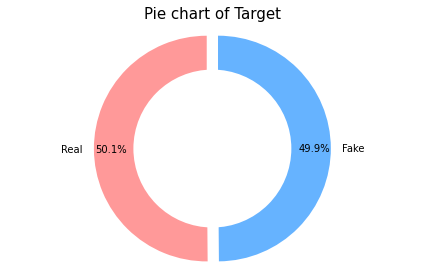

In [ ]:
#Pie chart of Target
labels = [ 'Real','Fake']
values = df['label'].value_counts()
colors = ['#ff9999','#66b3ff']
explode = (0.05,0.05)

fig1, ax1 = plt.subplots()

plt.pie(values, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')
ax1.set_title("Pie chart of Target", 
              fontdict = {'fontsize' : 15,
                          'fontweight' : 10},
              loc = 'center')
plt.tight_layout()
plt.show()

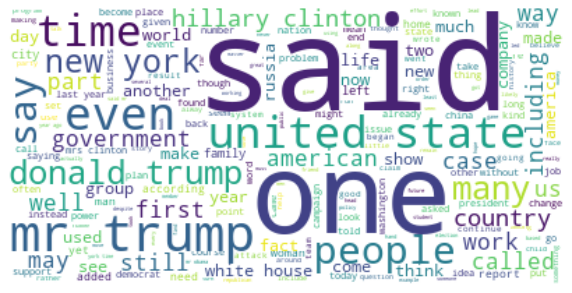

In [ ]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Join question into one text
text = " ".join(text for text in df['text'])

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

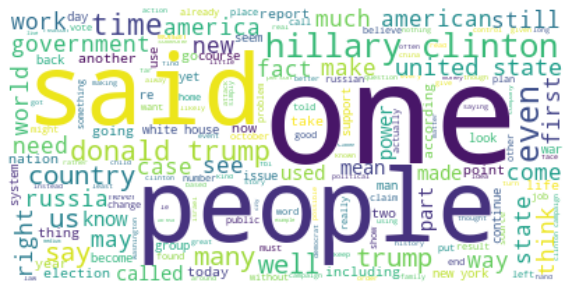

In [ ]:
#Join question into one text
text_fake = df.loc[df["label"] == 1, "text"]
text = " ".join(text for text in text_fake)

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

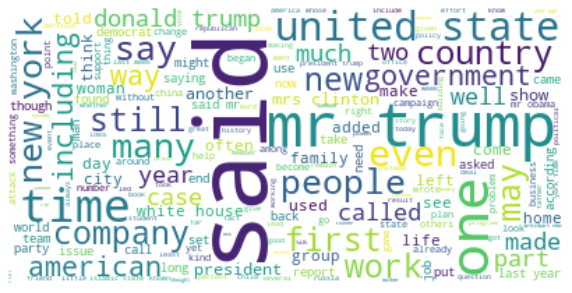

In [ ]:
#Join question into one text
text_real = df.loc[df["label"] == 0, "text"]
text = " ".join(text for text in text_real)

#Create Stopword List
stopwords = set(STOPWORDS)

#Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

#Display the generated image
plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



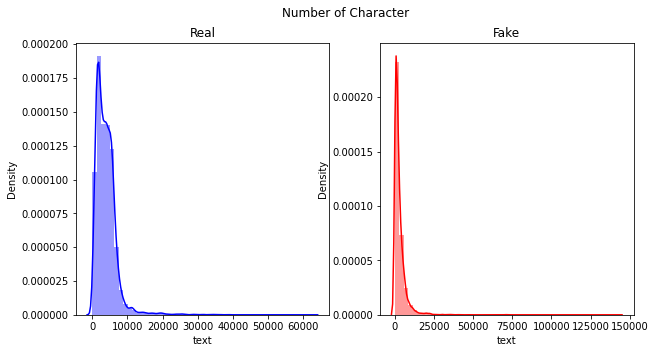

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

num_char1 = df.loc[df['label'] == 0, "text"].str.len()
sns.distplot(num_char1, ax = ax1, color = "blue")
ax1.set_title("Real")

num_char2 = df.loc[df['label'] == 1, "text"].str.len()
sns.distplot(num_char2, ax = ax2, color = "red")
ax2.set_title("Fake")

fig.suptitle("Number of Character")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



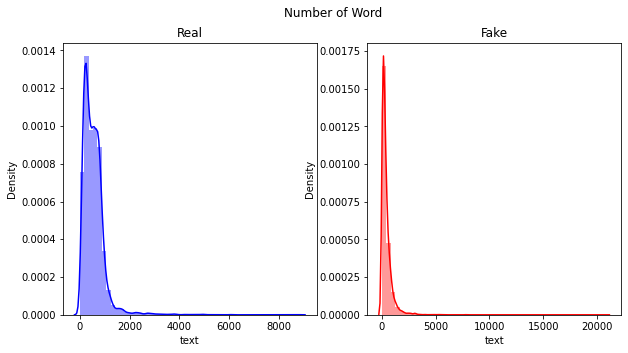

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10,5))

num_word1 = df.loc[df['label'] == 0, "text"].str.split().map(lambda x : len(x))
sns.distplot(num_word1, ax = ax1, color = "blue")
ax1.set_title("Real")

num_word2 = df.loc[df['label'] == 1, "text"].str.split().map(lambda x : len(x))
sns.distplot(num_word2, ax = ax2, color = "red")
ax2.set_title("Fake")

fig.suptitle("Number of Word")

plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


In [ ]:
# Ngram Analysis:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


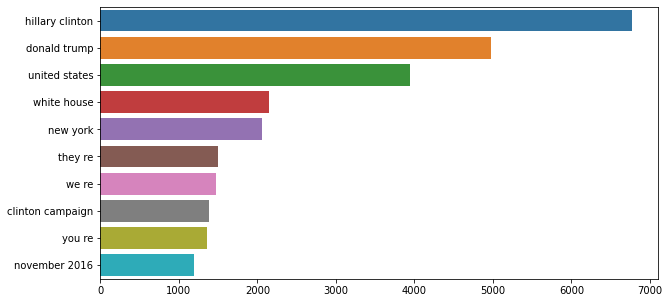

In [ ]:
plt.figure(figsize=(10,5))
fake_df = df[df['label']==1]
top_tweet_bigrams=get_top_tweet_bigrams(fake_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

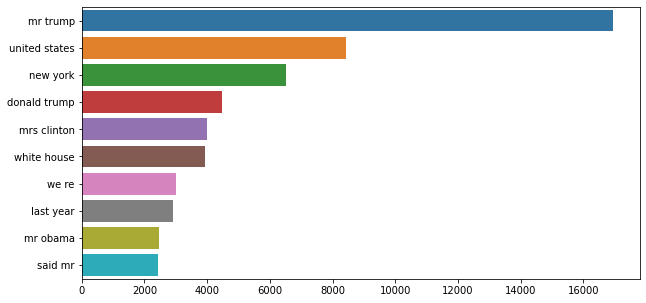

In [ ]:
plt.figure(figsize=(10,5))
true_df = df[df['label']==0]
top_tweet_bigrams=get_top_tweet_bigrams(true_df['text'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

In [ ]:
X = df['text']
y = df['label']

# Vectorise

In [ ]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
X = df.drop('label', axis=1)
X = df['text']
y = df['label']
#t = time()  # not compulsory

# loading CountVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
#tf_vectorizer = CountVectorizer() # or term frequency
#tf_vectorizer = TfidfVectorizer()
tf_vectorizer = HashingVectorizer()

X_tf = tf_vectorizer.fit_transform(X)

#duration = time() - t
#print("Time taken to extract features from training data : %f seconds" % (duration))
print("n_samples: %d, n_features: %d" % X_tf.shape)


n_samples: 18285, n_features: 1048576


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12250, 1048576), (6035, 1048576), (12250,), (6035,))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



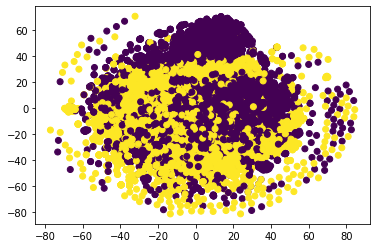

In [ ]:
from sklearn.manifold import TSNE
def TSNE_plot(data,data_labels):
        tsne = TSNE(n_components=2, random_state=50)
        transformed_data = tsne.fit_transform(data)
        k = np.array(transformed_data)
        Group=["Class 0","Class 1"]
        plt.scatter(k[:, 0],k[:, 1], c=data_labels)
        #plt.legend(loc="lower right")
        plt.show()
TSNE_plot(X_train,y_train)

In [ ]:
#t = time()

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

#training_time = time() - t
#print("train time: %0.3fs" % training_time)

In [ ]:
# predict the new document from the testing dataset
t = time()
y_pred = naive_bayes_classifier.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')


In [ ]:
t = time()
from sklearn.pipeline import make_pipeline
clf = make_pipeline(SVC(gamma='auto'))
clf.fit(X_train, y_train)

training_time = time() - t
print("train time: %0.3fs" % training_time)

train time: 392.335s


In [ ]:
# predict the new document from the testing dataset
t = time()
y_pred = clf.predict(X_test)

test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')


test time:  182.112s
accuracy:   0.567
              precision    recall  f1-score   support

           0       0.57      1.00      0.72      3419
           1       0.00      0.00      0.00      2616

    accuracy                           0.57      6035
   macro avg       0.28      0.50      0.36      6035
weighted avg       0.32      0.57      0.41      6035

confusion matrix:
[[3419    0]
 [2616    0]]
------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.033s
accuracy:   0.882
              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3419
           1       0.87      0.86      0.86      2616

    accuracy                           0.88      6035
   macro avg       0.88      0.88      0.88      6035
weighted avg       0.88      0.88      0.88      6035

confusion matrix:
[[3075  344]
 [ 369 2247]]


In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.014s
accuracy:   0.945
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3419
           1       0.95      0.93      0.94      2616

    accuracy                           0.94      6035
   macro avg       0.94      0.94      0.94      6035
weighted avg       0.94      0.94      0.94      6035

confusion matrix:
[[3279  140]
 [ 194 2422]]


In [ ]:
clf = AdaBoostClassifier()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  1.532s
accuracy:   0.924
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      3419
           1       0.91      0.92      0.91      2616

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035

confusion matrix:
[[3176  243]
 [ 216 2400]]


In [ ]:
clf = MLPClassifier()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.291s
accuracy:   0.965
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3419
           1       0.96      0.95      0.96      2616

    accuracy                           0.97      6035
   macro avg       0.97      0.96      0.96      6035
weighted avg       0.97      0.97      0.97      6035

confusion matrix:
[[3328   91]
 [ 120 2496]]


In [ ]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.077s
accuracy:   0.936
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3419
           1       0.93      0.93      0.93      2616

    accuracy                           0.94      6035
   macro avg       0.93      0.93      0.93      6035
weighted avg       0.94      0.94      0.94      6035

confusion matrix:
[[3226  193]
 [ 194 2422]]


In [ ]:
clf = PassiveAggressiveClassifier()
clf.fit(X_train, y_train)
t = time()
y_pred = clf.predict(X_test)
test_time = time() - t
print("test time:  %0.3fs" % test_time)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

test time:  0.009s
accuracy:   0.962
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      3419
           1       0.96      0.95      0.96      2616

    accuracy                           0.96      6035
   macro avg       0.96      0.96      0.96      6035
weighted avg       0.96      0.96      0.96      6035

confusion matrix:
[[3313  106]
 [ 124 2492]]


LSTM on tokenized text


In [ ]:
max_features=348

In [ ]:
from nltk.tokenize import sent_tokenize,word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words = max_features, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower = True, split = ' ')
tokenizer.fit_on_texts(texts = X)
X = tokenizer.texts_to_sequences(texts = X)

In [ ]:
X = pad_sequences(sequences = X, maxlen = max_features, padding = 'pre')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
lstm_model = Sequential(name = 'lstm_nn_model')
lstm_model.add(layer = Embedding(input_dim = max_features, output_dim = 120, name = '1st_layer'))
lstm_model.add(layer = LSTM(units = 120, dropout = 0.2, recurrent_dropout = 0.2, name = '2nd_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '3rd_layer'))
lstm_model.add(layer = Dense(units = 120,  activation = 'relu', name = '4th_layer'))
lstm_model.add(layer = Dropout(rate = 0.5, name = '5th_layer'))
lstm_model.add(layer = Dense(units = len(set(y)),  activation = 'sigmoid', name = 'output_layer'))
# compiling the model
lstm_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
lstm_model_fit = lstm_model.fit(X_train, y_train, epochs = 1)

 70/383 [====>.........................] - ETA: 1:20:38 - loss: 0.4694 - accuracy: 0.7714

In [ ]:
y_pred = lstm_model_fit.predict(X_test)
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)
print(metrics.classification_report(y_test, y_pred))
print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

GRU

In [ ]:
gru_model = Sequential(name = 'gru_nn_model')
gru_model.add(layer = Embedding(input_dim = max_features, output_dim = 120, name = '1st_layer'))
gru_model.add(layer = GRU(units = 120, dropout = 0.2, 
                          recurrent_dropout = 0.2, recurrent_activation = 'relu', 
                          activation = 'relu', name = '2nd_layer'))
gru_model.add(layer = Dropout(rate = 0.4, name = '3rd_layer'))
gru_model.add(layer = Dense(units = 120, activation = 'relu', name = '4th_layer'))
gru_model.add(layer = Dropout(rate = 0.2, name = '5th_layer'))
gru_model.add(layer = Dense(units = len(set(y)), activation = 'softmax', name = 'output_layer'))
# compiling the model
gru_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
gru_model.fit(X_train, y_train, epochs = 1)

456/456 [==============================] - 412s 897ms/step - loss: nan - accuracy: 0.5836


In [ ]:
y_pred = gru_model.predict(X_test)

In [ ]:
preds=[]
for i in range(len(y_pred)):
  if (y_pred[i][1])>0.5:
    preds.append(1)
  else:
    preds.append(0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.5780949766675817